In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMAGES_PATH = 'Images40'
IMAGE_SIZE = 40
CHANNELS = 3

images_subfolders = listdir(IMAGES_PATH)
print images_subfolders

['42', '7', '6', '30', '3', '18', '11', '20', '2', '13', '21', '8', '34', '1', '38', '17', '37', '33', '40', '12', '35', '4', '14', '16', '29', '31', '10', '19', '36', '25', '28', '15', '32', '43', '23', '27', '26', '41', '9', '24', '5', '22', '39']


In [3]:
dataset = np.empty((0, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
labels = np.empty((0, 1), dtype = 'int32')

print 'Dataset:', dataset.shape
print 'Labels:', labels.shape
    
for subfolder in images_subfolders:
    images = listdir(join(IMAGES_PATH, subfolder))
    
    print '*** Loading:', join(IMAGES_PATH, subfolder)
    
    for image in images:
        img = cv2.imread(join(IMAGES_PATH, subfolder, image)).reshape((1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
        
        dataset = np.concatenate((dataset, img), axis = 0)
        labels = np.append(labels, int(subfolder) - 1) # TF requires labels in [0, 43]
    
    print 'Dataset:', dataset.shape
    print 'Labels:', labels.shape
    
labels = np.reshape(labels, (-1, 1)) # The np.append op above reshapes it from (smth, 1) to (smth,)

Dataset: (0, 40, 40, 3)
Labels: (0, 1)
*** Loading: Images40/42
Dataset: (240, 40, 40, 3)
Labels: (240,)
*** Loading: Images40/7
Dataset: (660, 40, 40, 3)
Labels: (660,)
*** Loading: Images40/6
Dataset: (2520, 40, 40, 3)
Labels: (2520,)
*** Loading: Images40/30
Dataset: (2790, 40, 40, 3)
Labels: (2790,)
*** Loading: Images40/3
Dataset: (5040, 40, 40, 3)
Labels: (5040,)
*** Loading: Images40/18
Dataset: (6150, 40, 40, 3)
Labels: (6150,)
*** Loading: Images40/11
Dataset: (8160, 40, 40, 3)
Labels: (8160,)
*** Loading: Images40/20
Dataset: (8370, 40, 40, 3)
Labels: (8370,)
*** Loading: Images40/2
Dataset: (10590, 40, 40, 3)
Labels: (10590,)
*** Loading: Images40/13
Dataset: (12690, 40, 40, 3)
Labels: (12690,)
*** Loading: Images40/21
Dataset: (13050, 40, 40, 3)
Labels: (13050,)
*** Loading: Images40/8
Dataset: (14490, 40, 40, 3)
Labels: (14490,)
*** Loading: Images40/34
Dataset: (15179, 40, 40, 3)
Labels: (15179,)
*** Loading: Images40/1
Dataset: (15389, 40, 40, 3)
Labels: (15389,)
*** Loa

In [4]:
#np.save('DATASET-40', dataset)
#np.save('LABELS-40', labels)

In [3]:
dataset = np.load('DATASET-40.npy').astype(int)
labels = np.load('LABELS-40.npy').astype(int)

NUM_LABELS = len(np.unique(labels))

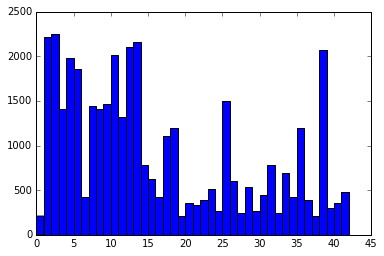

In [4]:
plt.hist(labels, bins = range(0, NUM_LABELS))
plt.show()

In [180]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gray_dataset = np.empty((dataset.shape[0], IMAGE_SIZE, IMAGE_SIZE))

for i in range(gray_dataset.shape[0]):
    gray_dataset[i] = rgb2gray(dataset[i])
    
CHANNELS = 1

print labels.shape
print dataset.shape
print gray_dataset.shape

In [5]:
import tensorflow as tf
import math as math
from sklearn.model_selection import train_test_split

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(dataset, labels, 
                                                                        train_size = 0.85, random_state = 0)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
print "train images"
print train_images.shape
print "train labels"
print train_labels.shape
print "test images"
print test_images.shape
print "test labels"
print test_labels.shape

train images
(33327, 40, 40, 3)
train labels
(33327, 1)
test images
(5882, 40, 40, 3)
test labels
(5882, 1)


(40, 40, 3)
[[[106 114 124]
  [105 115 124]
  [105 116 124]
  ..., 
  [ 88 105 117]
  [ 87 104 117]
  [ 90 105 120]]

 [[100 108 118]
  [ 98 108 117]
  [ 98 109 117]
  ..., 
  [ 95 109 122]
  [ 93 106 120]
  [ 92 105 120]]

 [[ 94 102 111]
  [ 91 101 109]
  [ 90 101 108]
  ..., 
  [ 99 113 127]
  [ 97 109 124]
  [ 94 106 122]]

 ..., 
 [[ 89  95 101]
  [ 87  92  95]
  [100 102 101]
  ..., 
  [ 78  84  86]
  [ 72  79  80]
  [ 65  72  73]]

 [[ 86  90  98]
  [ 84  89  94]
  [ 97 100 100]
  ..., 
  [ 80  85  86]
  [ 73  78  79]
  [ 65  71  72]]

 [[ 83  87  97]
  [ 82  87  93]
  [ 95  97  98]
  ..., 
  [ 79  84  84]
  [ 72  78  78]
  [ 65  71  71]]]


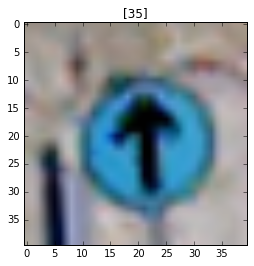

In [8]:
sample_index = 103

sample_image = train_images[sample_index]

print sample_image.shape
print sample_image

plt.imshow(sample_image)#, cmap='gray')
plt.title(train_labels[sample_index])

In [9]:
# Feature Scaling
tmp1 = train_images / 255.0
tmp2 = test_images / 255.0
del train_images, test_images
train_images = tmp1
test_images = tmp2
del tmp1, tmp2

(40, 40, 3)
[[[ 0.41568627  0.44705882  0.48627451]
  [ 0.41176471  0.45098039  0.48627451]
  [ 0.41176471  0.45490196  0.48627451]
  ..., 
  [ 0.34509804  0.41176471  0.45882353]
  [ 0.34117647  0.40784314  0.45882353]
  [ 0.35294118  0.41176471  0.47058824]]

 [[ 0.39215686  0.42352941  0.4627451 ]
  [ 0.38431373  0.42352941  0.45882353]
  [ 0.38431373  0.42745098  0.45882353]
  ..., 
  [ 0.37254902  0.42745098  0.47843137]
  [ 0.36470588  0.41568627  0.47058824]
  [ 0.36078431  0.41176471  0.47058824]]

 [[ 0.36862745  0.4         0.43529412]
  [ 0.35686275  0.39607843  0.42745098]
  [ 0.35294118  0.39607843  0.42352941]
  ..., 
  [ 0.38823529  0.44313725  0.49803922]
  [ 0.38039216  0.42745098  0.48627451]
  [ 0.36862745  0.41568627  0.47843137]]

 ..., 
 [[ 0.34901961  0.37254902  0.39607843]
  [ 0.34117647  0.36078431  0.37254902]
  [ 0.39215686  0.4         0.39607843]
  ..., 
  [ 0.30588235  0.32941176  0.3372549 ]
  [ 0.28235294  0.30980392  0.31372549]
  [ 0.25490196  0.28235

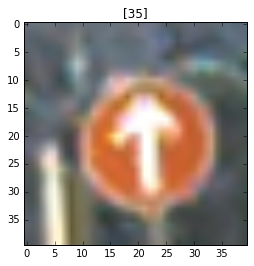

In [11]:
sample_index = 103

sample_image = train_images[sample_index]

print sample_image.shape
print sample_image

plt.imshow(sample_image)
plt.title(train_labels[sample_index])

In [12]:
# Input parameters
samples = train_images.shape[0]

# Hyper-parameters
start_learning_rate = 0.001
dropout_prob = 0.4
max_iter = 100
batch_size = 256

# Inputs
input_x = tf.placeholder(tf.float32, [None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS])
input_y = tf.placeholder(tf.int32, [None])

# Conv-1
# Input:  Batch_size, 40, 40, 3
# Output: Batch_size, 40, 40, 32 (32 filters)
conv1_input_channels = CHANNELS
conv1_filter_dim = 3
conv1_num_filters = 32

conv1_weights = tf.Variable(tf.truncated_normal([conv1_filter_dim, conv1_filter_dim, conv1_input_channels, 
                                                 conv1_num_filters], stddev = 0.1))
conv1_biases = tf.Variable(tf.zeros([conv1_num_filters]))
conv1 = tf.nn.conv2d(input_x, conv1_weights, strides = [1, 1, 1, 1], padding = 'SAME')

h1_conv1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_biases))

# Max-pool-1
# Input:  Batch_size, 40, 40, 32
# Output: Batch_size, 20, 20, 32 (2x2 pool reduces in 50% de image)
h2_pool1 = tf.nn.max_pool(h1_conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

# Norm-1
h2_norm = tf.nn.lrn(h2_pool1, 4, bias = 1.0, alpha = 0.001 / 9.0, beta = 0.75)

# Conv-2
# Input:  Batch_size, 20, 20, 32
# Output: Batch_size, 20, 20, 64 (64 filters)
conv2_input_channels = conv1_num_filters
conv2_filter_dim = 3
conv2_num_filters = 64

conv2_weights = tf.Variable(tf.truncated_normal([conv2_filter_dim, conv2_filter_dim, conv2_input_channels, 
                                                 conv2_num_filters], stddev = 0.1))
conv2_biases = tf.Variable(tf.zeros([conv2_num_filters]))
conv2 = tf.nn.conv2d(h2_norm, conv2_weights, strides = [1, 1, 1, 1], padding = 'SAME')

h3_conv2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_biases))

# Max-pool-2
# Input:  Batch_size, 20, 20, 64
# Output: Batch_size, 10, 10, 64 (2x2 pool reduces in 50% de image)
h4_pool2 = tf.nn.max_pool(h3_conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

# Norm-2
h4_norm = tf.nn.lrn(h4_pool2, 4, bias = 1.0, alpha = 0.001 / 9.0, beta = 0.75)

# Conv-3
# Input:  Batch_size, 10, 10, 64
# Output: Batch_size, 10, 10, 128 (128 filters)
conv3_input_channels = conv2_num_filters
conv3_filter_dim = 3
conv3_num_filters = 128

conv3_weights = tf.Variable(tf.truncated_normal([conv3_filter_dim, conv3_filter_dim, conv3_input_channels, 
                                                 conv3_num_filters], stddev = 0.1))
conv3_biases = tf.Variable(tf.zeros([conv3_num_filters]))
conv3 = tf.nn.conv2d(h4_norm, conv3_weights, strides = [1, 1, 1, 1], padding = 'SAME')

h5_conv3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_biases))

# Max-pool-3
# Input:  Batch_size, 10, 10, 128
# Output: Batch_size, 5, 5, 128 (2x2 pool reduces in 50% de image)
h5_pool3 = tf.nn.max_pool(h5_conv3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

# Norm-3
h5_norm = tf.nn.lrn(h5_pool3, 4, bias = 1.0, alpha = 0.001 / 9.0, beta = 0.75)

# Flatten
# Input: Batch_size, 5, 5, 128
# Output: Batch_size, 5 * 5 * 128
pool3_shape = h5_norm.get_shape().as_list()
h5_flatten = tf.reshape(h5_norm, [-1, pool3_shape[1] * pool3_shape[2] * pool3_shape[3]])

# Fully connected-1
# Input:  Batch_size, 5 * 5 * 128
# Output: Batch_size, 1024
fc1_input_size = pool3_shape[1] * pool3_shape[2] * pool3_shape[3]
fc1_units = 1024

fc1_weights = tf.Variable(tf.truncated_normal([fc1_input_size, fc1_units], stddev = math.sqrt(2.0 / fc1_input_size)))
fc1_biases = tf.Variable(tf.zeros([fc1_units]))

h6_fc1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h5_flatten, fc1_weights), fc1_biases))

# Dropout
h6_dropout = tf.nn.dropout(h6_fc1, dropout_prob)

# Fully connected-2
# Input:  Batch_size, 1024
# Output: Batch_size, 512
fc2_input_size = fc1_units
fc2_units = 512

fc2_weights = tf.Variable(tf.truncated_normal([fc2_input_size, fc2_units], stddev = math.sqrt(2.0 / fc2_input_size)))
fc2_biases = tf.Variable(tf.zeros([fc2_units]))

h7_fc2 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h6_dropout, fc2_weights), fc2_biases))

# Dropout
h7_dropout = tf.nn.dropout(h7_fc2, dropout_prob)

# Fully connected-3
# Input:  Batch_size, 512
# Output: Batch_size, 256
fc3_input_size = fc2_units
fc3_units = 256

fc3_weights = tf.Variable(tf.truncated_normal([fc3_input_size, fc3_units], stddev = math.sqrt(2.0 / fc3_input_size)))
fc3_biases = tf.Variable(tf.zeros([fc3_units]))

h8_fc3 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h7_dropout, fc3_weights), fc3_biases))

# Dropout
h8_dropout = tf.nn.dropout(h8_fc3, dropout_prob)

# Logits
# Input: Batch_size, 256
# Output: Batch_size, 43
logits_weights = tf.Variable(tf.truncated_normal([fc3_units, NUM_LABELS], stddev = math.sqrt(2.0 / fc3_units)))
logits_biases = tf.Variable(tf.zeros([NUM_LABELS]))
logits = tf.nn.bias_add(tf.matmul(h8_dropout, logits_weights), logits_biases)

# Loss and optimiser
loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = input_y))

global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 1000, 0.96, staircase = True)
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op, global_step = global_step)

# Accuracy for testing
prediction = tf.cast(tf.argmax(logits, 1), tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, input_y), tf.float32)) # Needs to be float to round the mean

# Initializing the variables
init = tf.global_variables_initializer()

In [13]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)
sess.run(init)

test_batch_x = test_images.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
test_batch_y = test_labels.flatten()

losses = []
train_accuracy = []
test_accuracy = []

# Training cycle
for epoch in range(max_iter):        
    avg_loss = 0.0
    avg_acc = 0.0
    test_avg_acc = 0.0
    total_batch = int(samples / batch_size)

    # Loop over all batches
    for i in range(total_batch):
        batch_index = np.random.choice(samples, batch_size, replace = False)
        batch_x = train_images[batch_index].reshape((-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
        batch_y = train_labels[batch_index].flatten()
                
        # Run optimization op (backprop) and cost op (to get loss value)
        _, loss, acc = sess.run([train_op, loss_op, accuracy], feed_dict = {input_x: batch_x, input_y: batch_y})
                
        # Compute average loss and accuracy
        avg_loss += loss / total_batch
        avg_acc += acc / total_batch
         
    losses.append(avg_loss)
    train_accuracy.append(avg_acc)
    
    # Loop over test batch to check its accuracy
    for i in range(test_batch_x.shape[0]):
        sample = test_batch_x[i]
        sample_acc = sess.run([accuracy], feed_dict = {input_x: sample.reshape([1, sample.shape[0], sample.shape[1], 
                                                                              sample.shape[2]]),
                                                    input_y: np.reshape(np.array(test_batch_y[i]), (1,))})

        test_avg_acc = test_avg_acc + sample_acc[0]
 
    test_accuracy.append(test_avg_acc / test_batch_x.shape[0])

    print('%04d' % (epoch), "loss={:.40f}".format(avg_loss), "acc={:.10f}".format(acc),
          "acc_test={:.10f}".format(test_accuracy[-1]), "lr={:.8f}".format(sess.run(learning_rate)))
    
    if test_accuracy[-1] > 0.993: # Reached a certain test accuracy, let's stop there
        break

('0000', 'loss=3.2769290814032907555031215451890602707863', 'acc=0.2890625000', 'acc_test=0.2849370962', 'lr=0.00100000')
('0001', 'loss=1.7496434651888339573133634985424578189850', 'acc=0.5937500000', 'acc_test=0.5809248555', 'lr=0.00100000')
('0002', 'loss=0.8588262473161402121846208501665387302637', 'acc=0.8554687500', 'acc_test=0.7939476369', 'lr=0.00100000')
('0003', 'loss=0.4189645417607746336052798596938373520970', 'acc=0.9062500000', 'acc_test=0.8988439306', 'lr=0.00100000')
('0004', 'loss=0.2328127247782854902791171980425133369863', 'acc=0.9257812500', 'acc_test=0.9311458688', 'lr=0.00100000')
('0005', 'loss=0.1579575672172583711283522234225529246032', 'acc=0.9570312500', 'acc_test=0.9505270316', 'lr=0.00100000')
('0006', 'loss=0.1136552238120483032668417422428319696337', 'acc=0.9648437500', 'acc_test=0.9649778987', 'lr=0.00100000')
('0007', 'loss=0.0825181374756189106589587822782050352544', 'acc=0.9765625000', 'acc_test=0.9726283577', 'lr=0.00096000')
('0008', 'loss=0.0631815

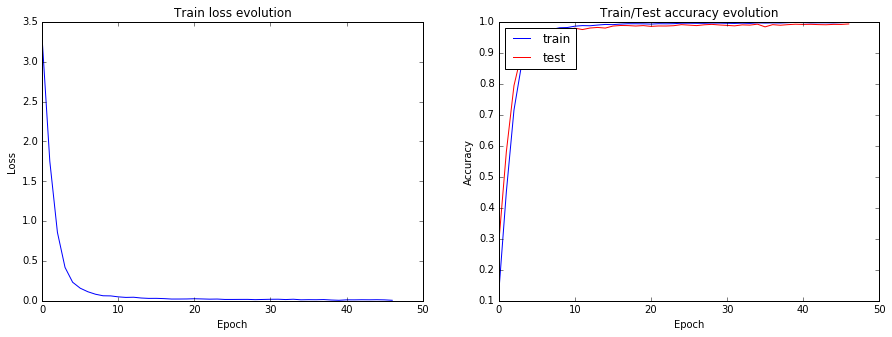

In [14]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.plot(losses)
plt.title('Train loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(train_accuracy, 'b', label = 'train')
plt.plot(test_accuracy, 'r', label = 'test')
plt.title('Train/Test accuracy evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 2)

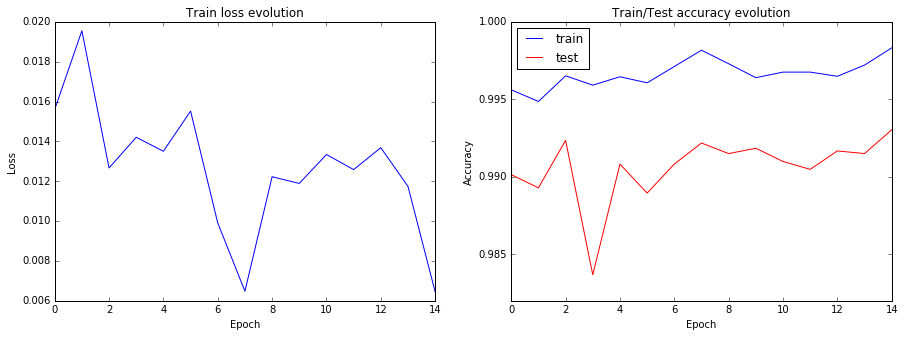

In [15]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.plot(losses[-15:])
plt.title('Train loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(train_accuracy[-15:], 'b', label = 'train')
plt.plot(test_accuracy[-15:], 'r', label = 'test')
plt.title('Train/Test accuracy evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 2)

In [63]:
#sess.close()
#tf.reset_default_graph()

In [16]:
predicted = np.empty(test_labels.shape)

for i in range(test_batch_x.shape[0]):
    sample = test_batch_x[i]
    predicted[i] = sess.run([prediction], feed_dict = {input_x: sample.reshape([1, sample.shape[0], sample.shape[1], 
                                                                          sample.shape[2]])})

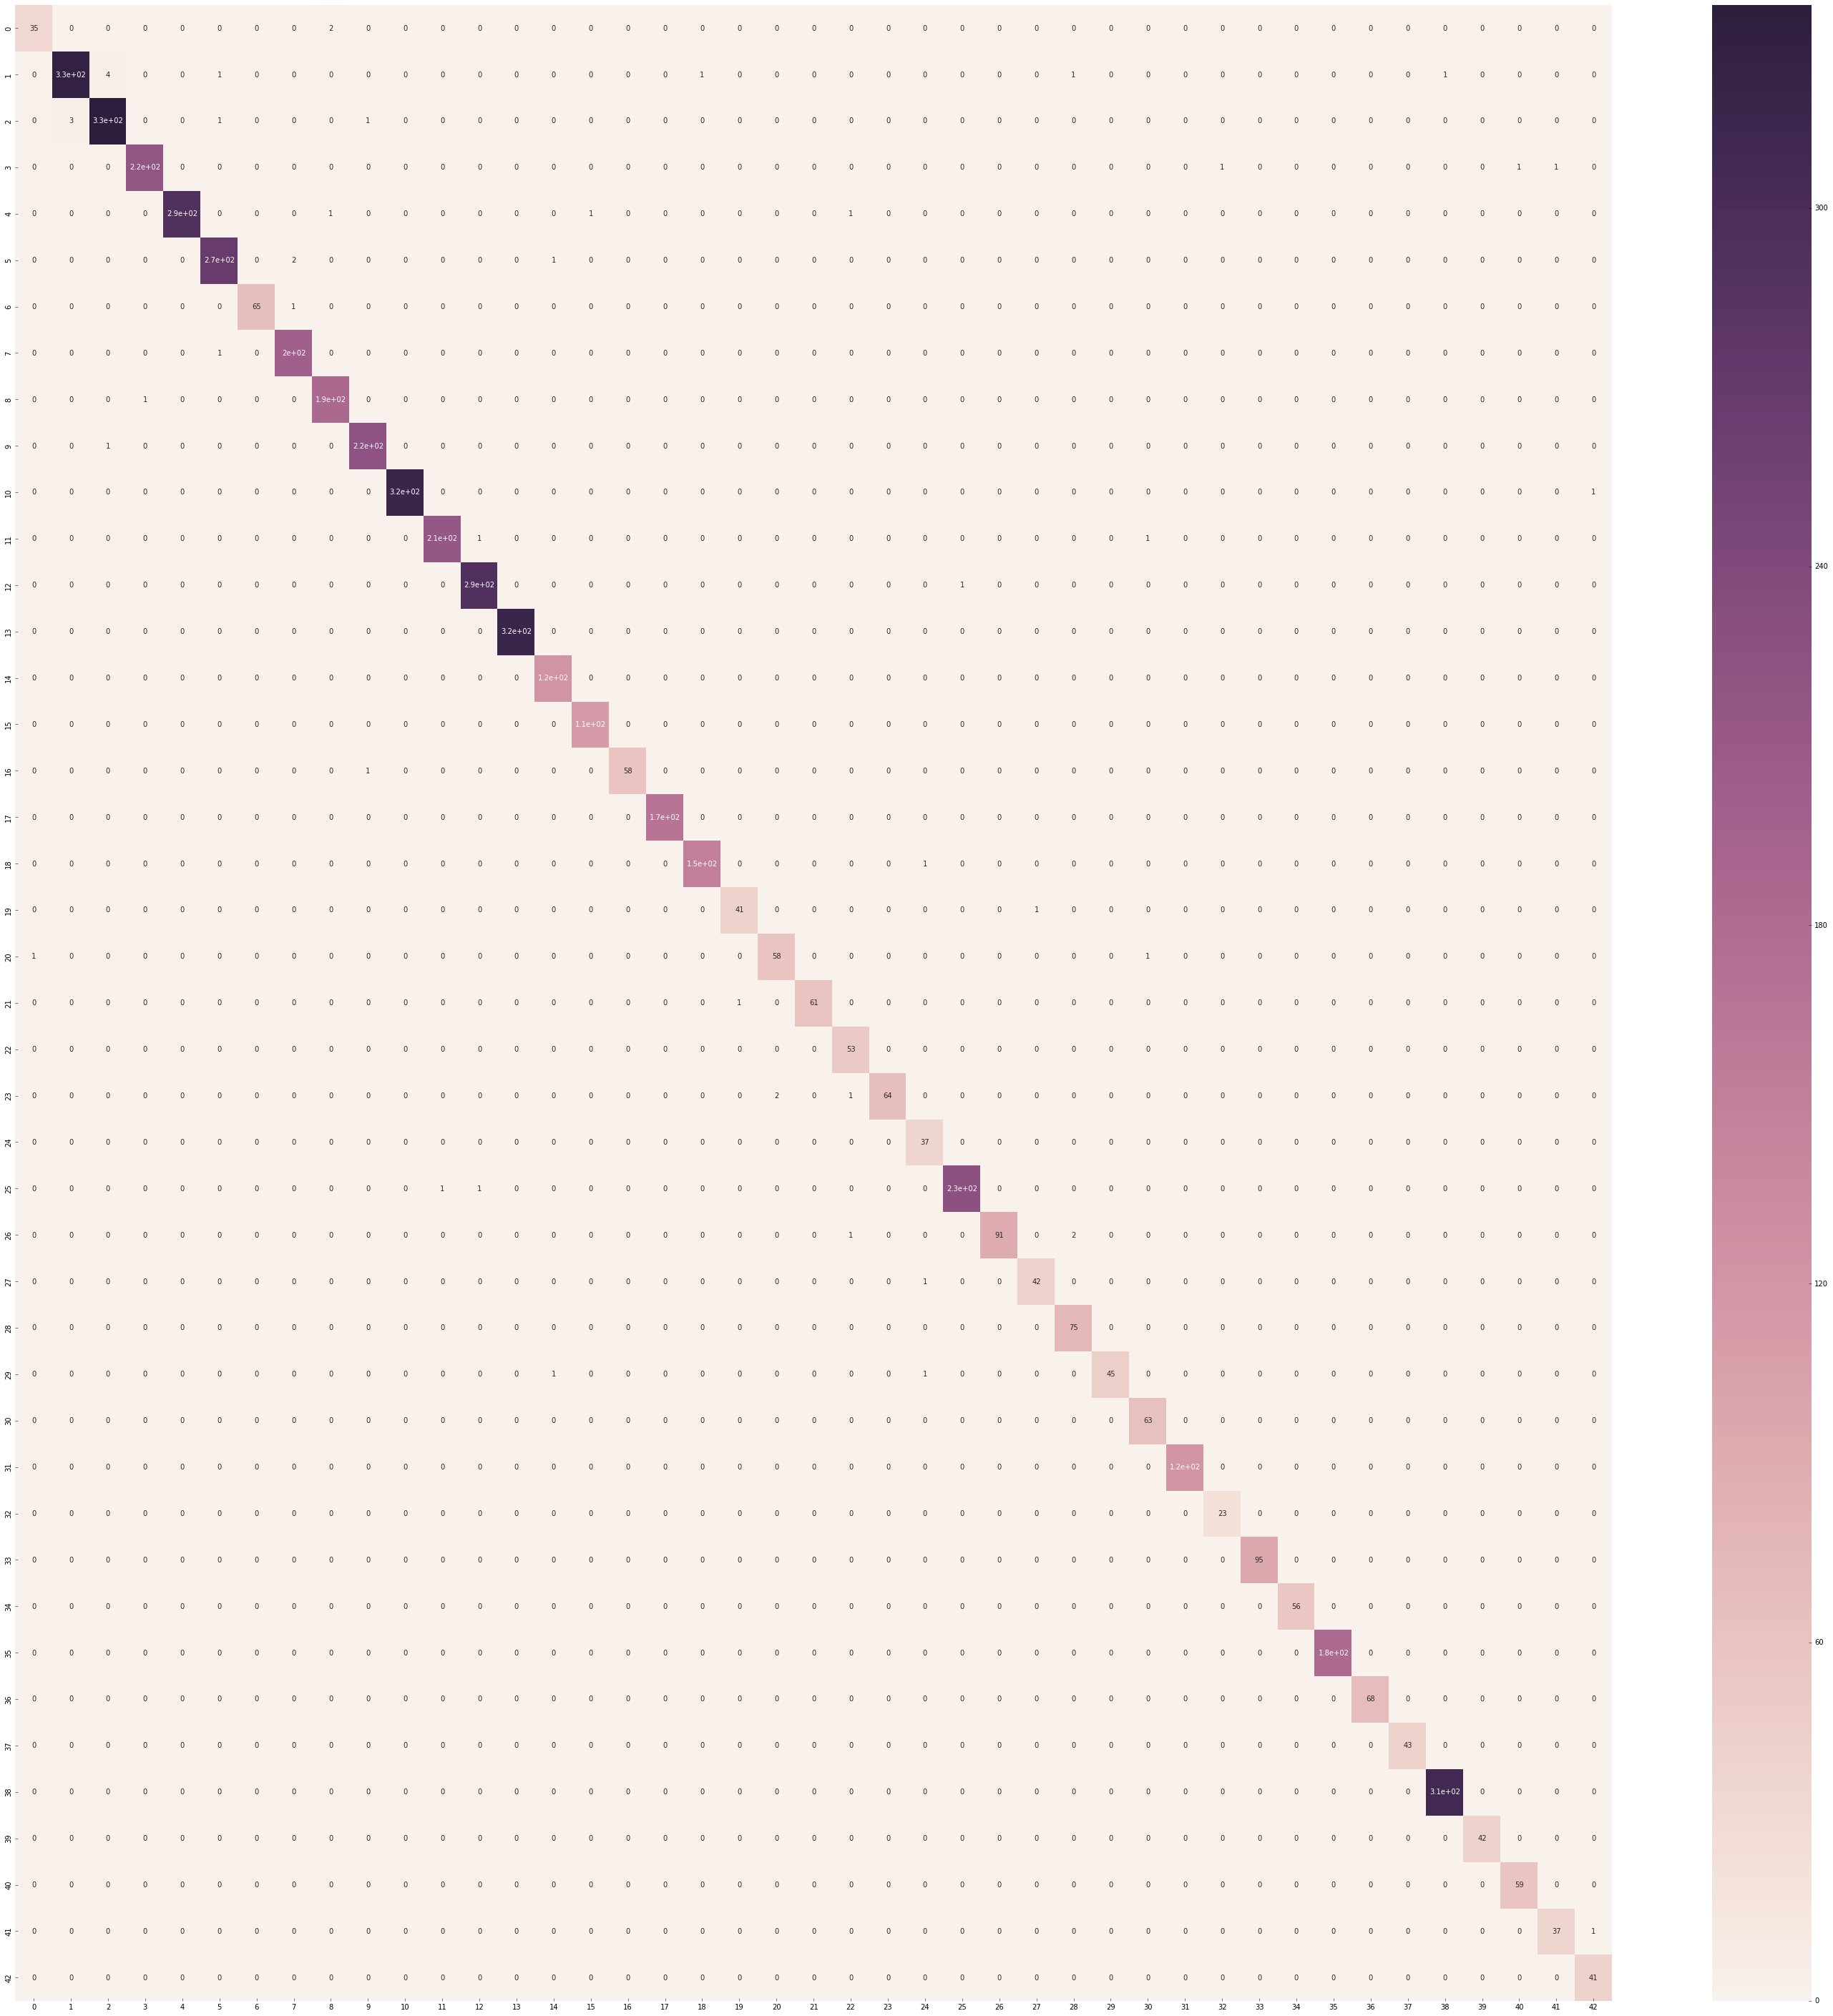

In [17]:
import seaborn.apionly as sn
from sklearn.metrics import confusion_matrix

conf_array = confusion_matrix(test_labels, predicted)

plt.figure(figsize = (50, 50))
sn.heatmap(conf_array, annot=True)

In [28]:
def getActivations(layer, sample):
    units = sess.run(layer, feed_dict = {input_x: sample.reshape([1, sample.shape[0], sample.shape[1], sample.shape[2]])})
    
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize = (40, 40))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i + 1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0, :, :, i], interpolation = "nearest", cmap = "gray")

(40, 40, 3)


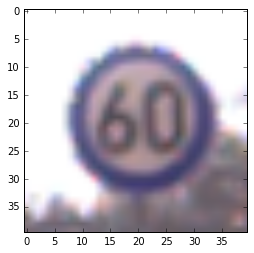

In [29]:
test_image = test_batch_x[0]

print test_image.shape

plt.imshow(test_image)

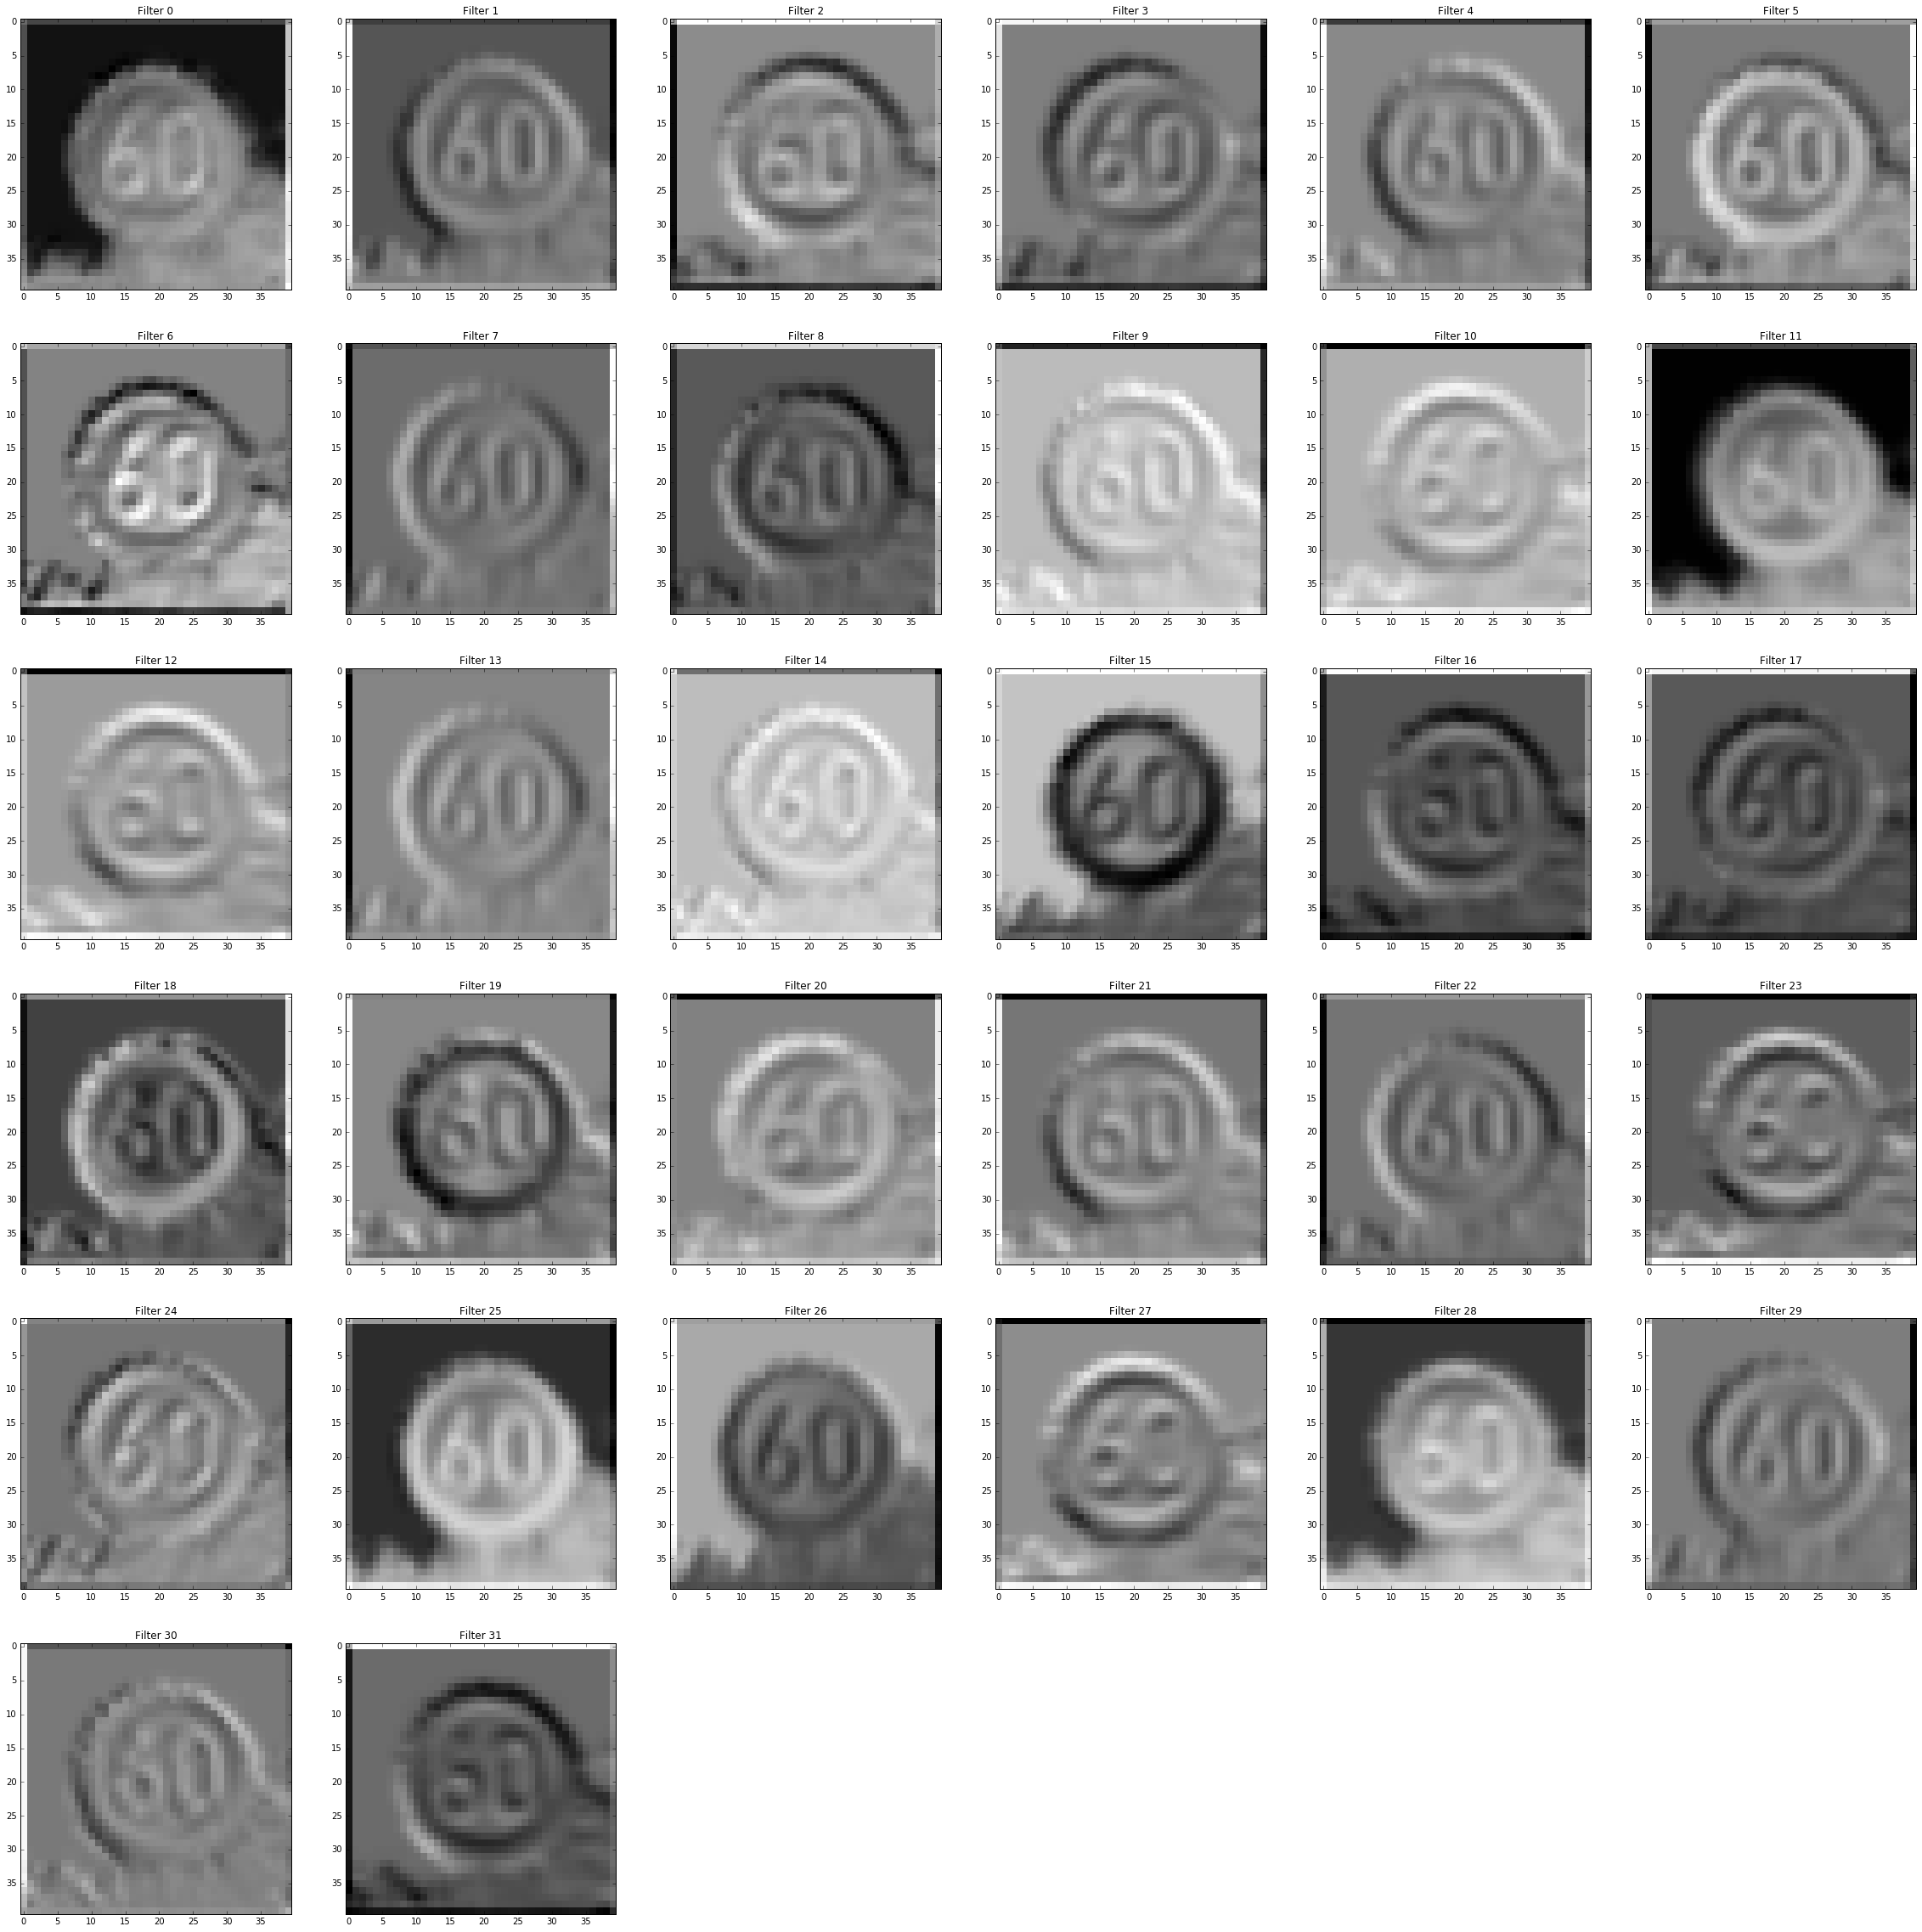

In [30]:
getActivations(conv1, test_image)

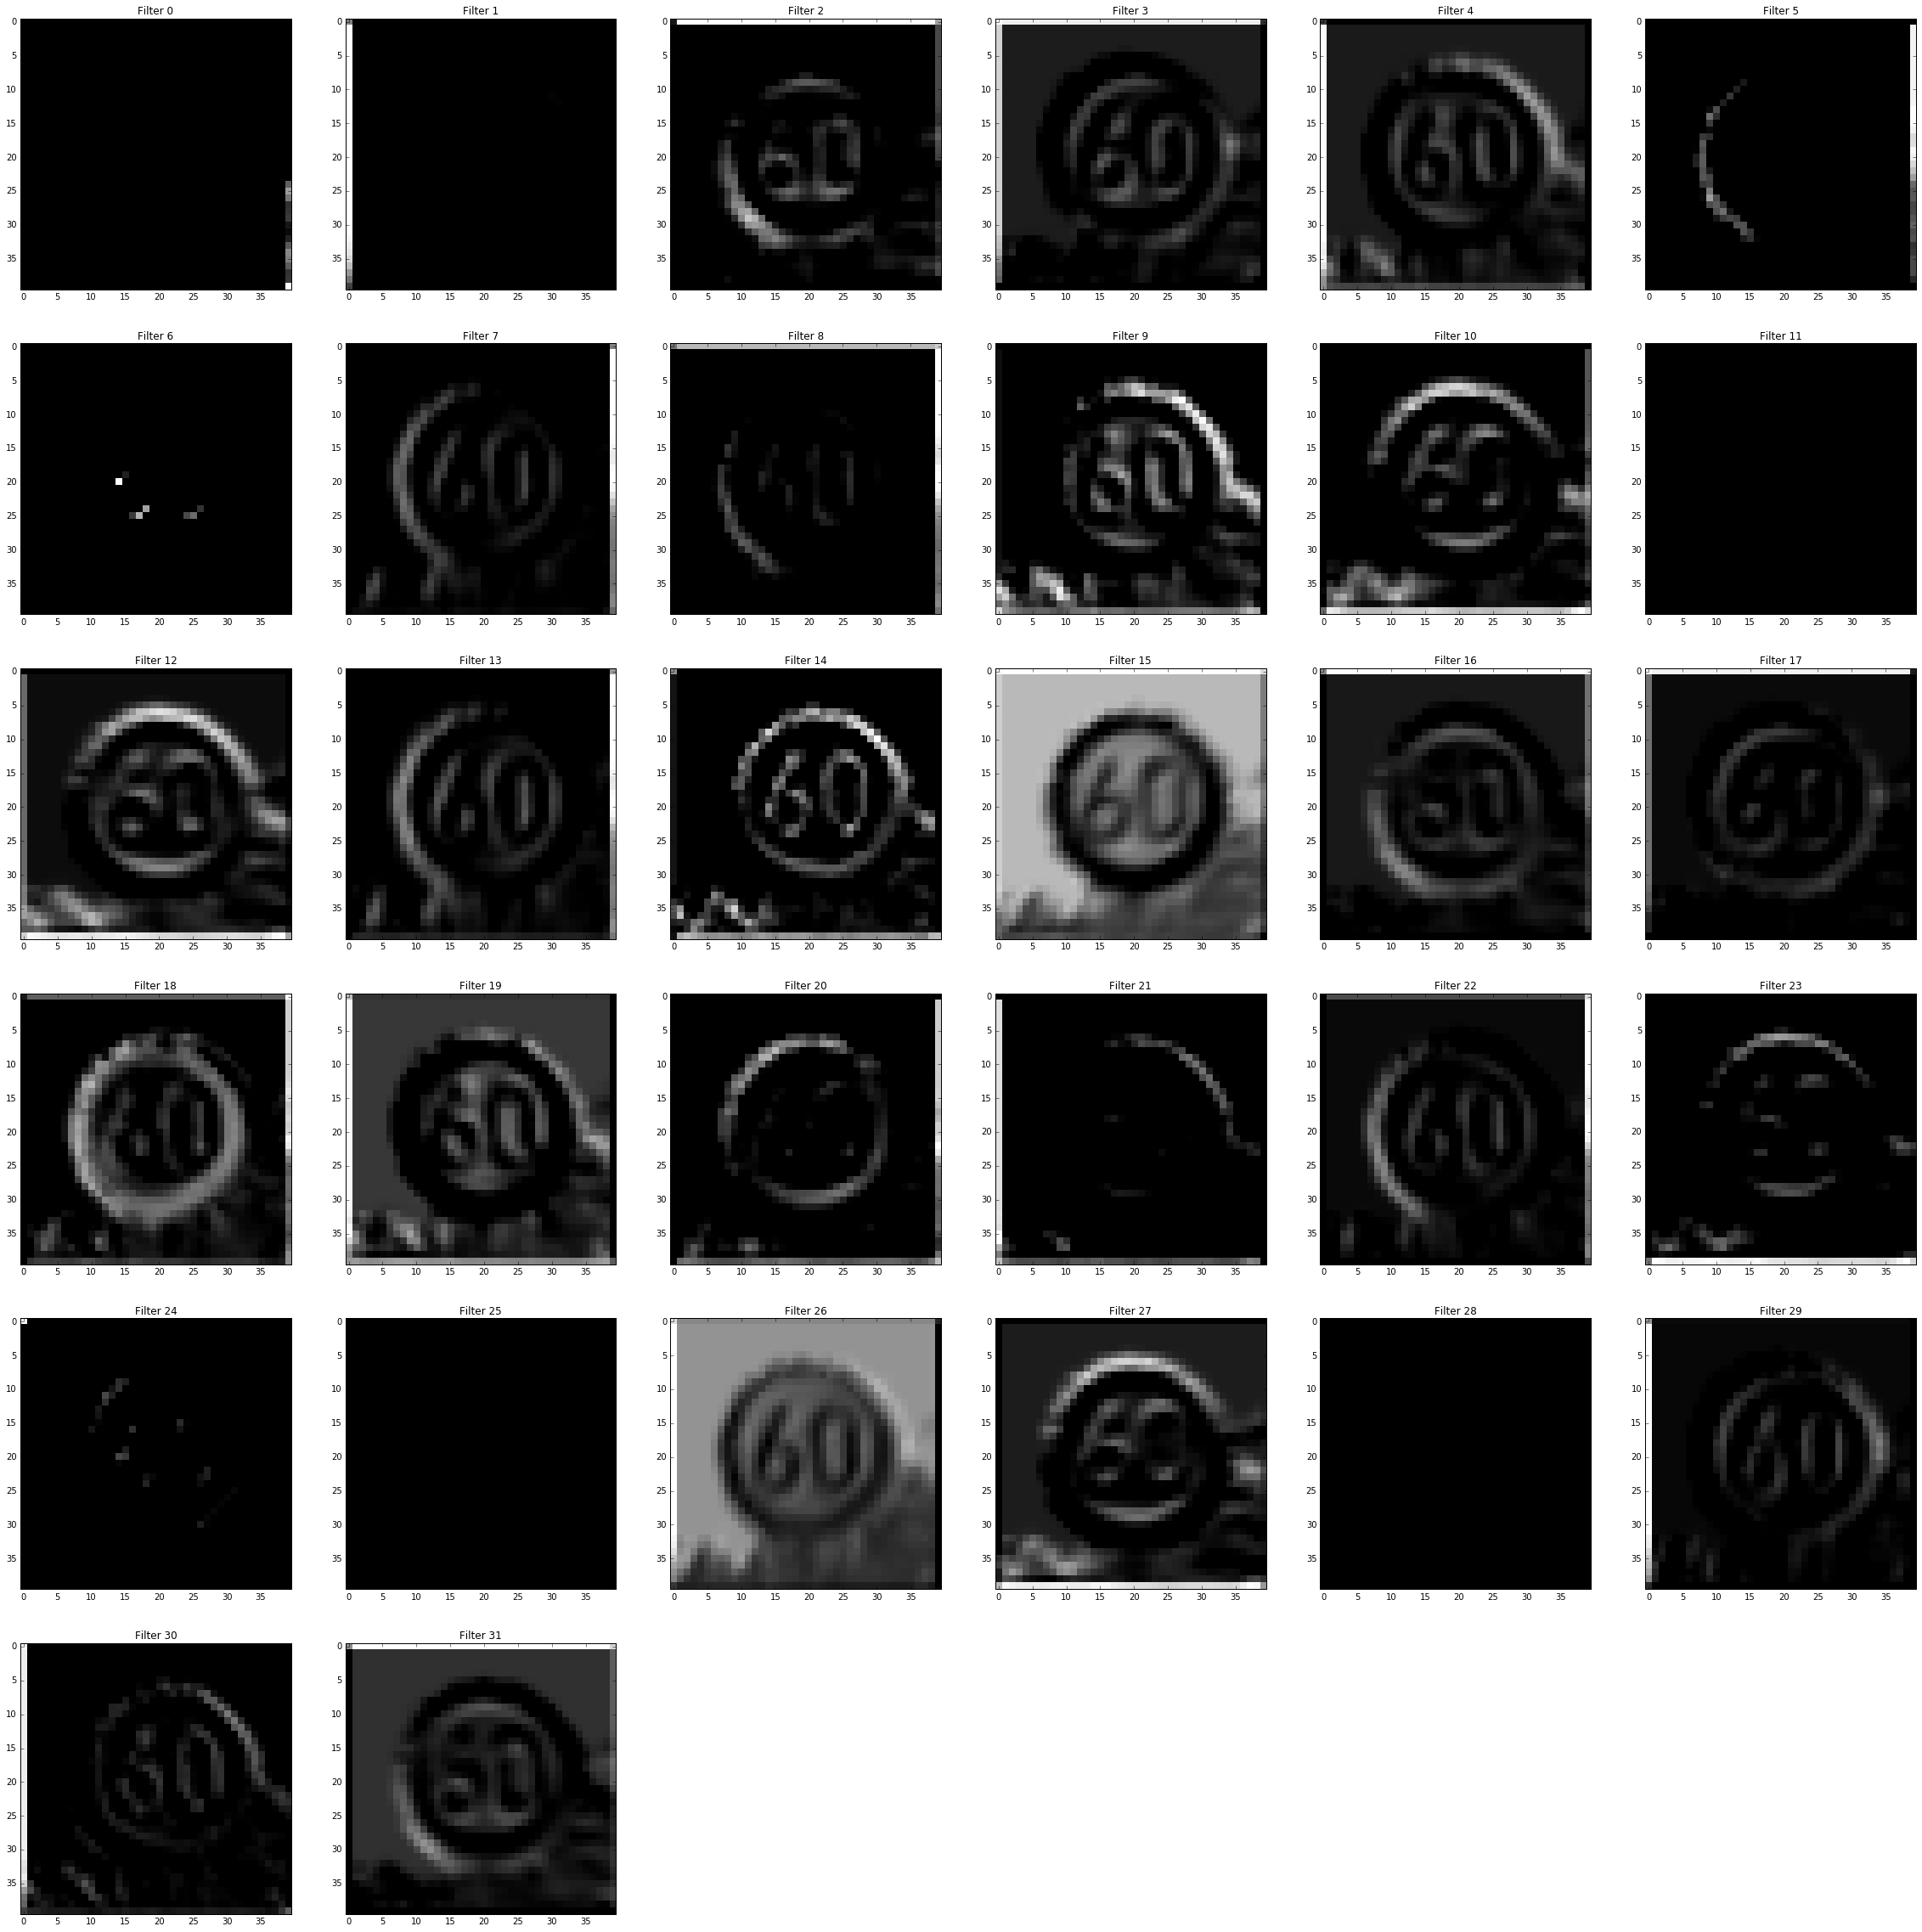

In [35]:
getActivations(h1_conv1, test_image)

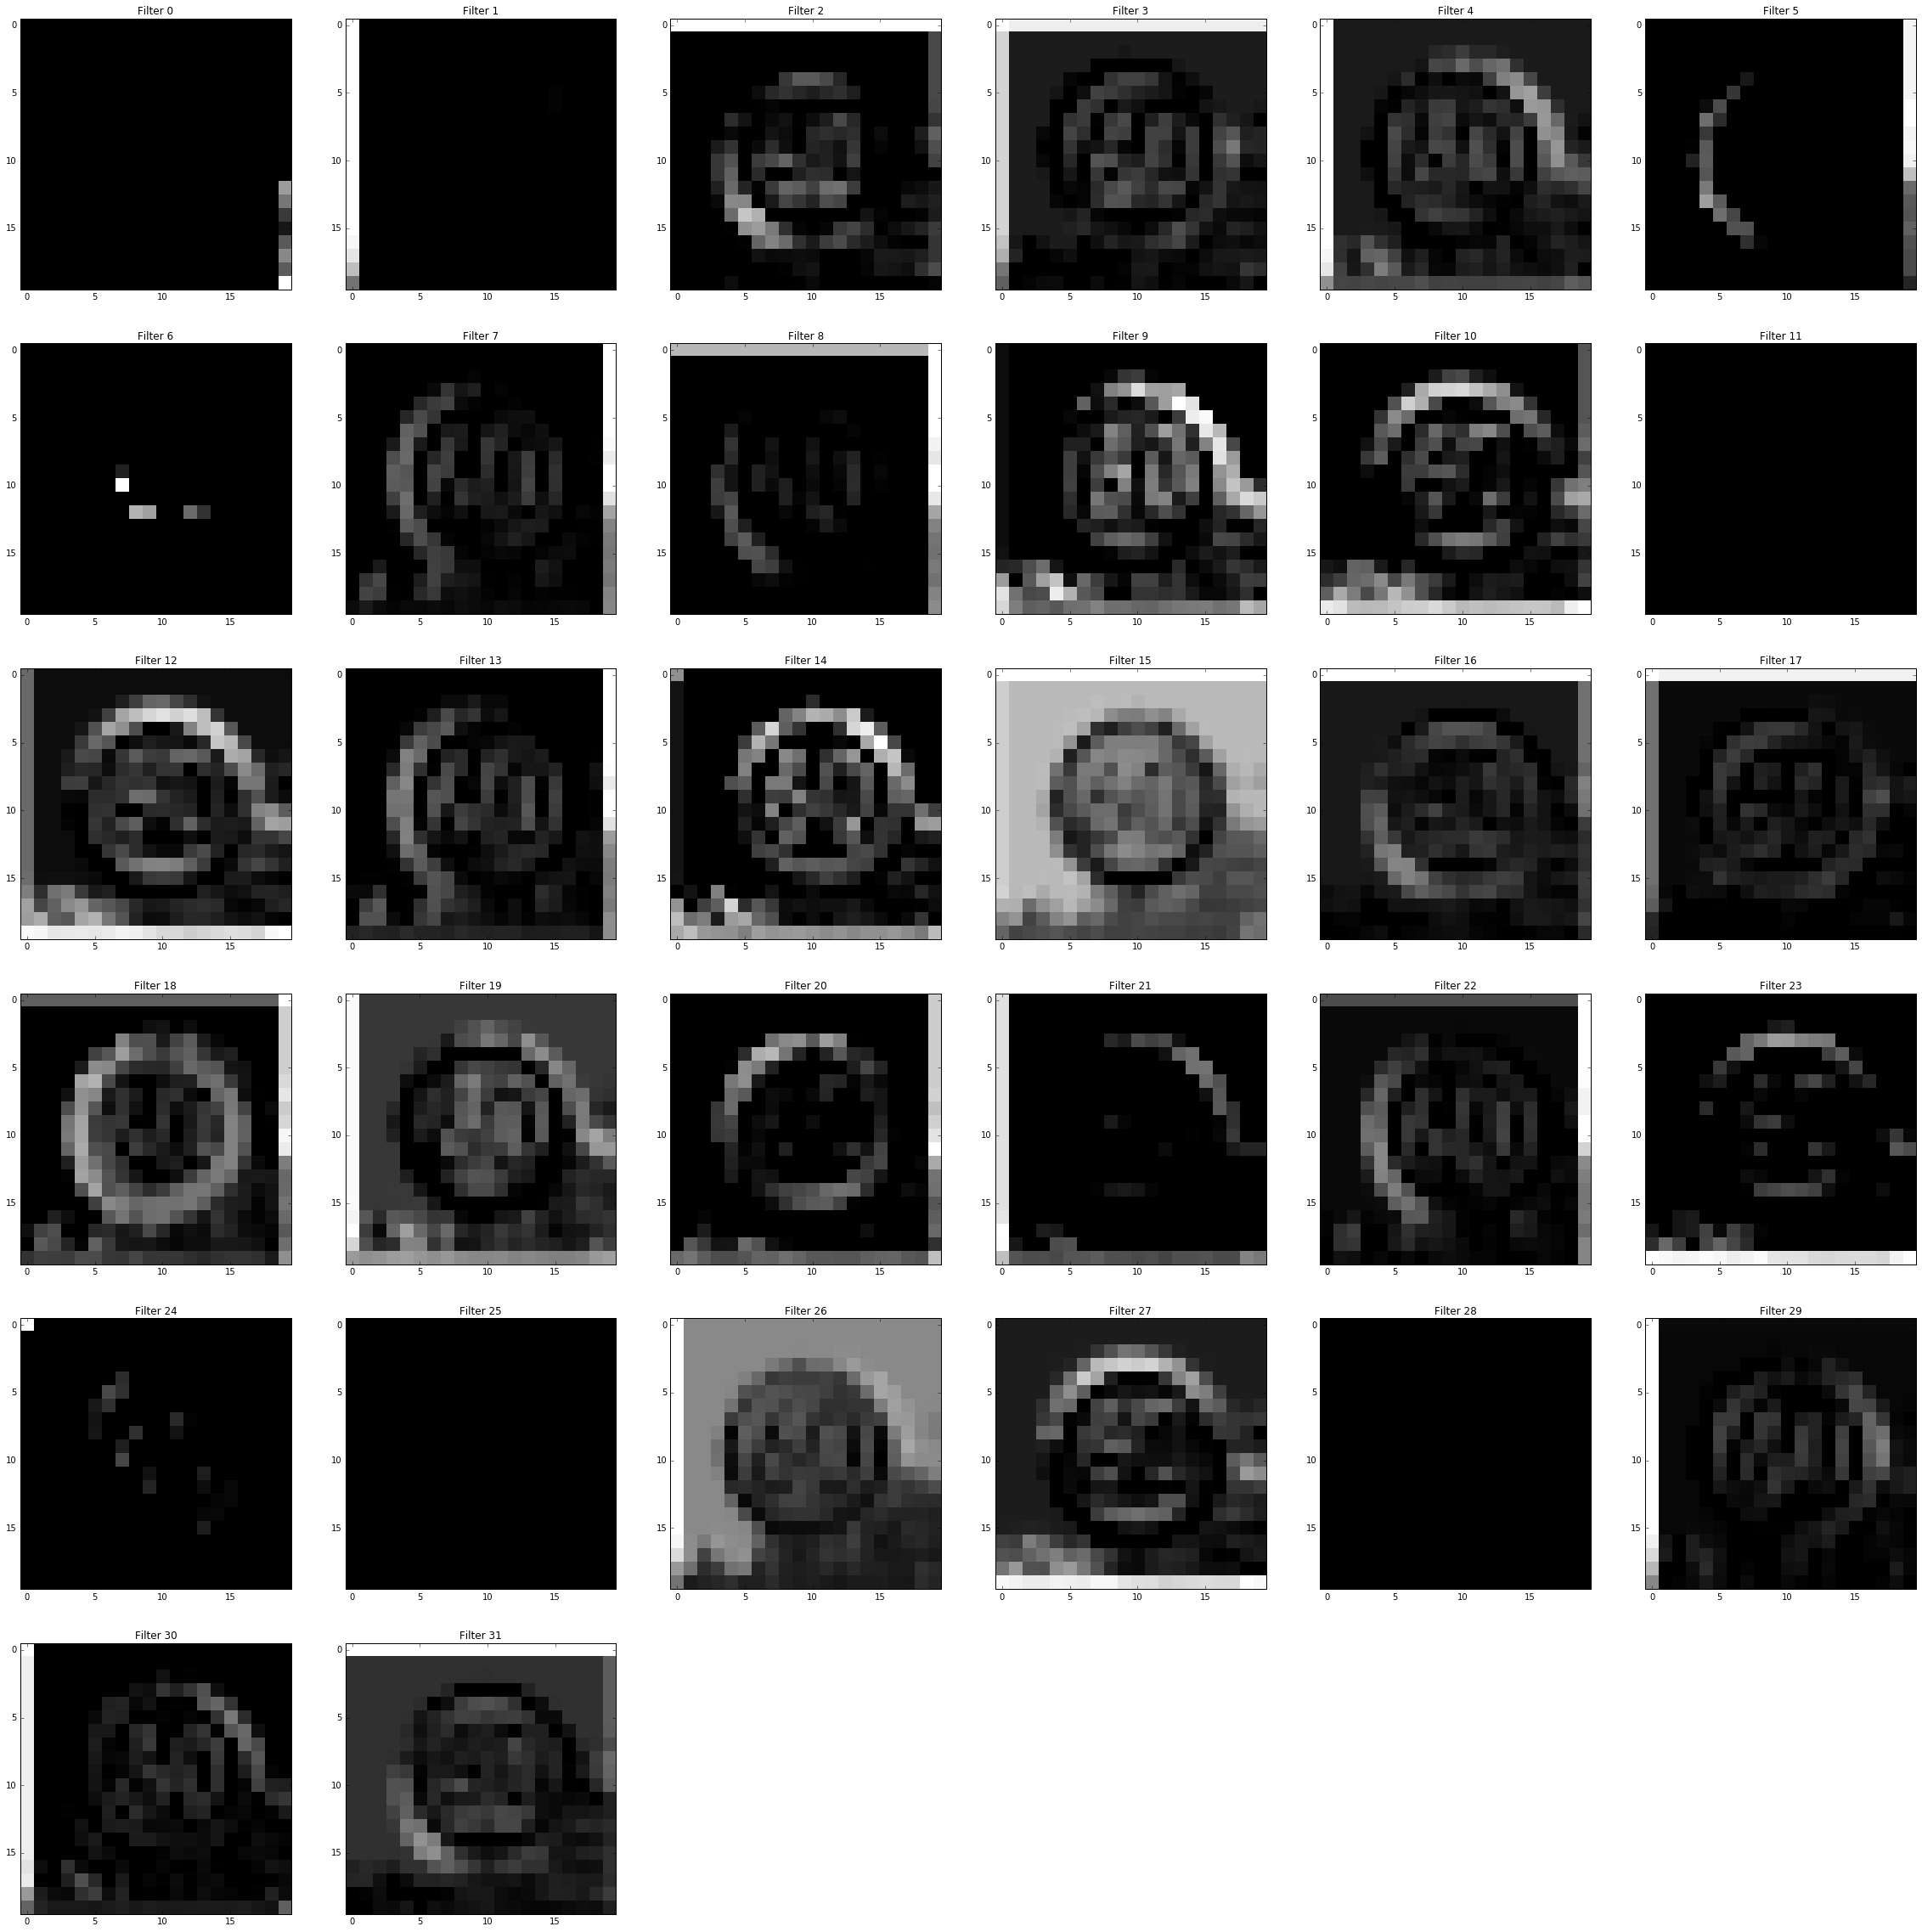

In [36]:
getActivations(h2_pool1, test_image)

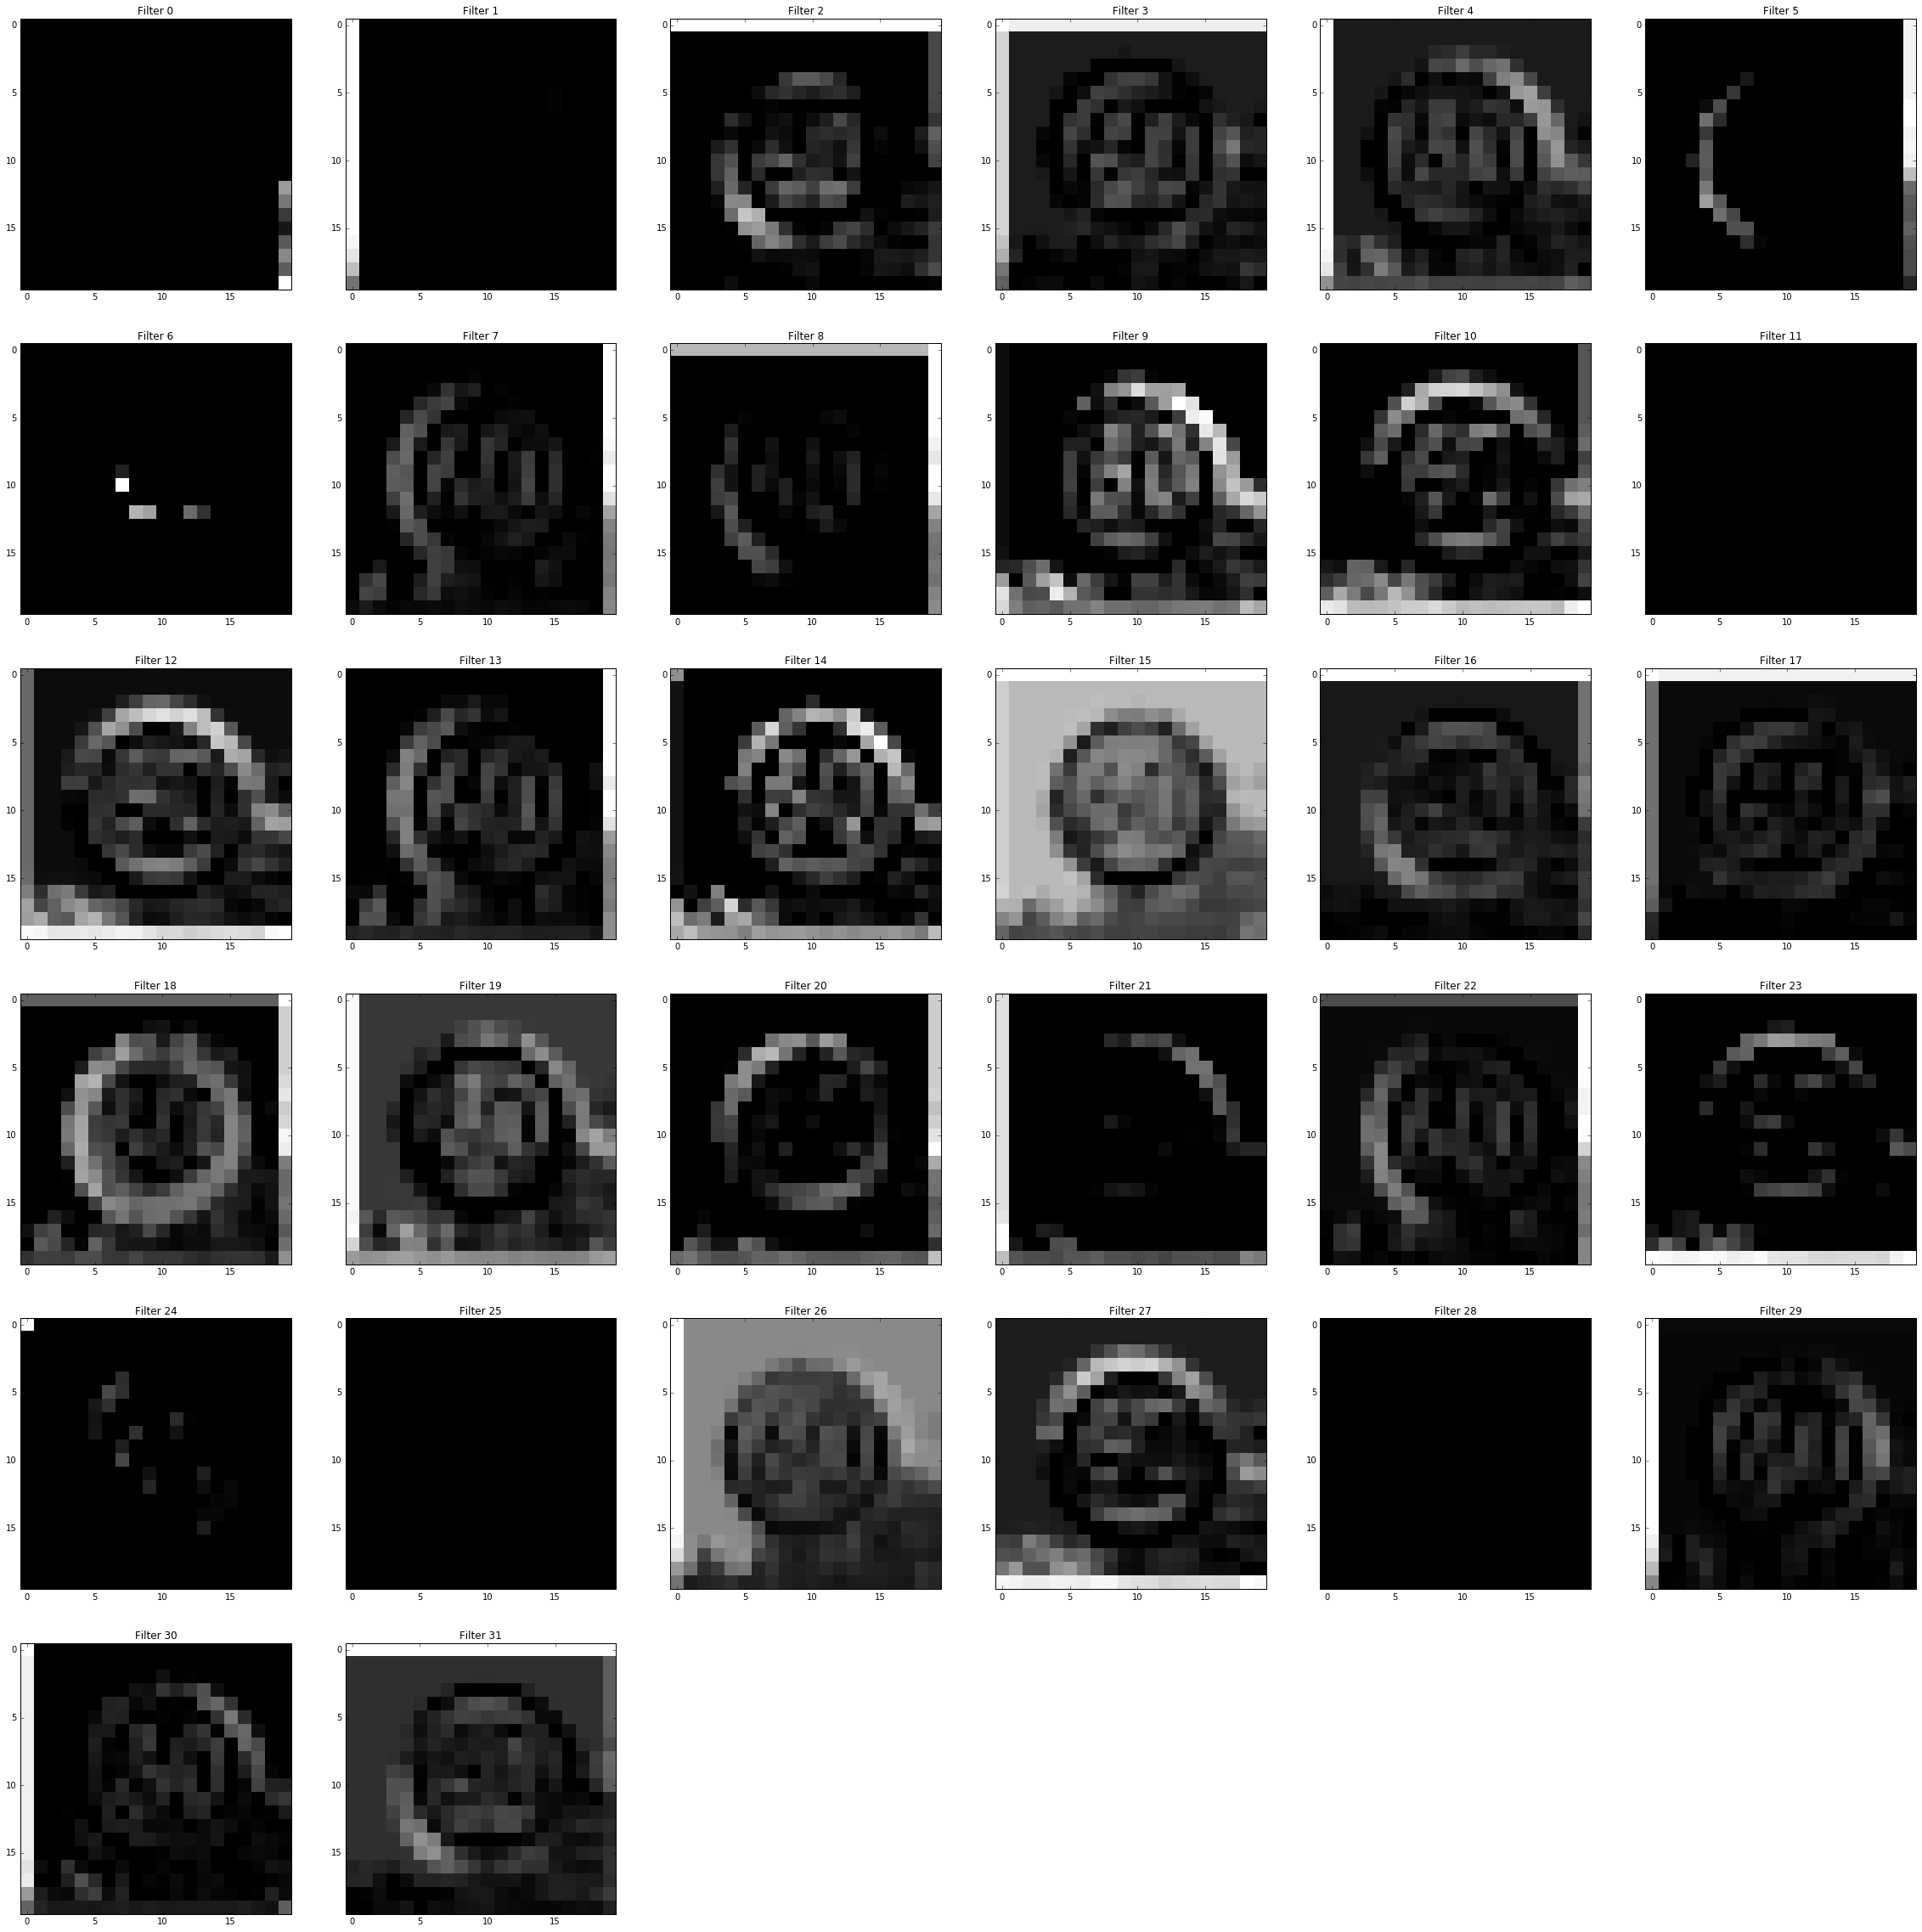

In [37]:
getActivations(h2_norm, test_image)

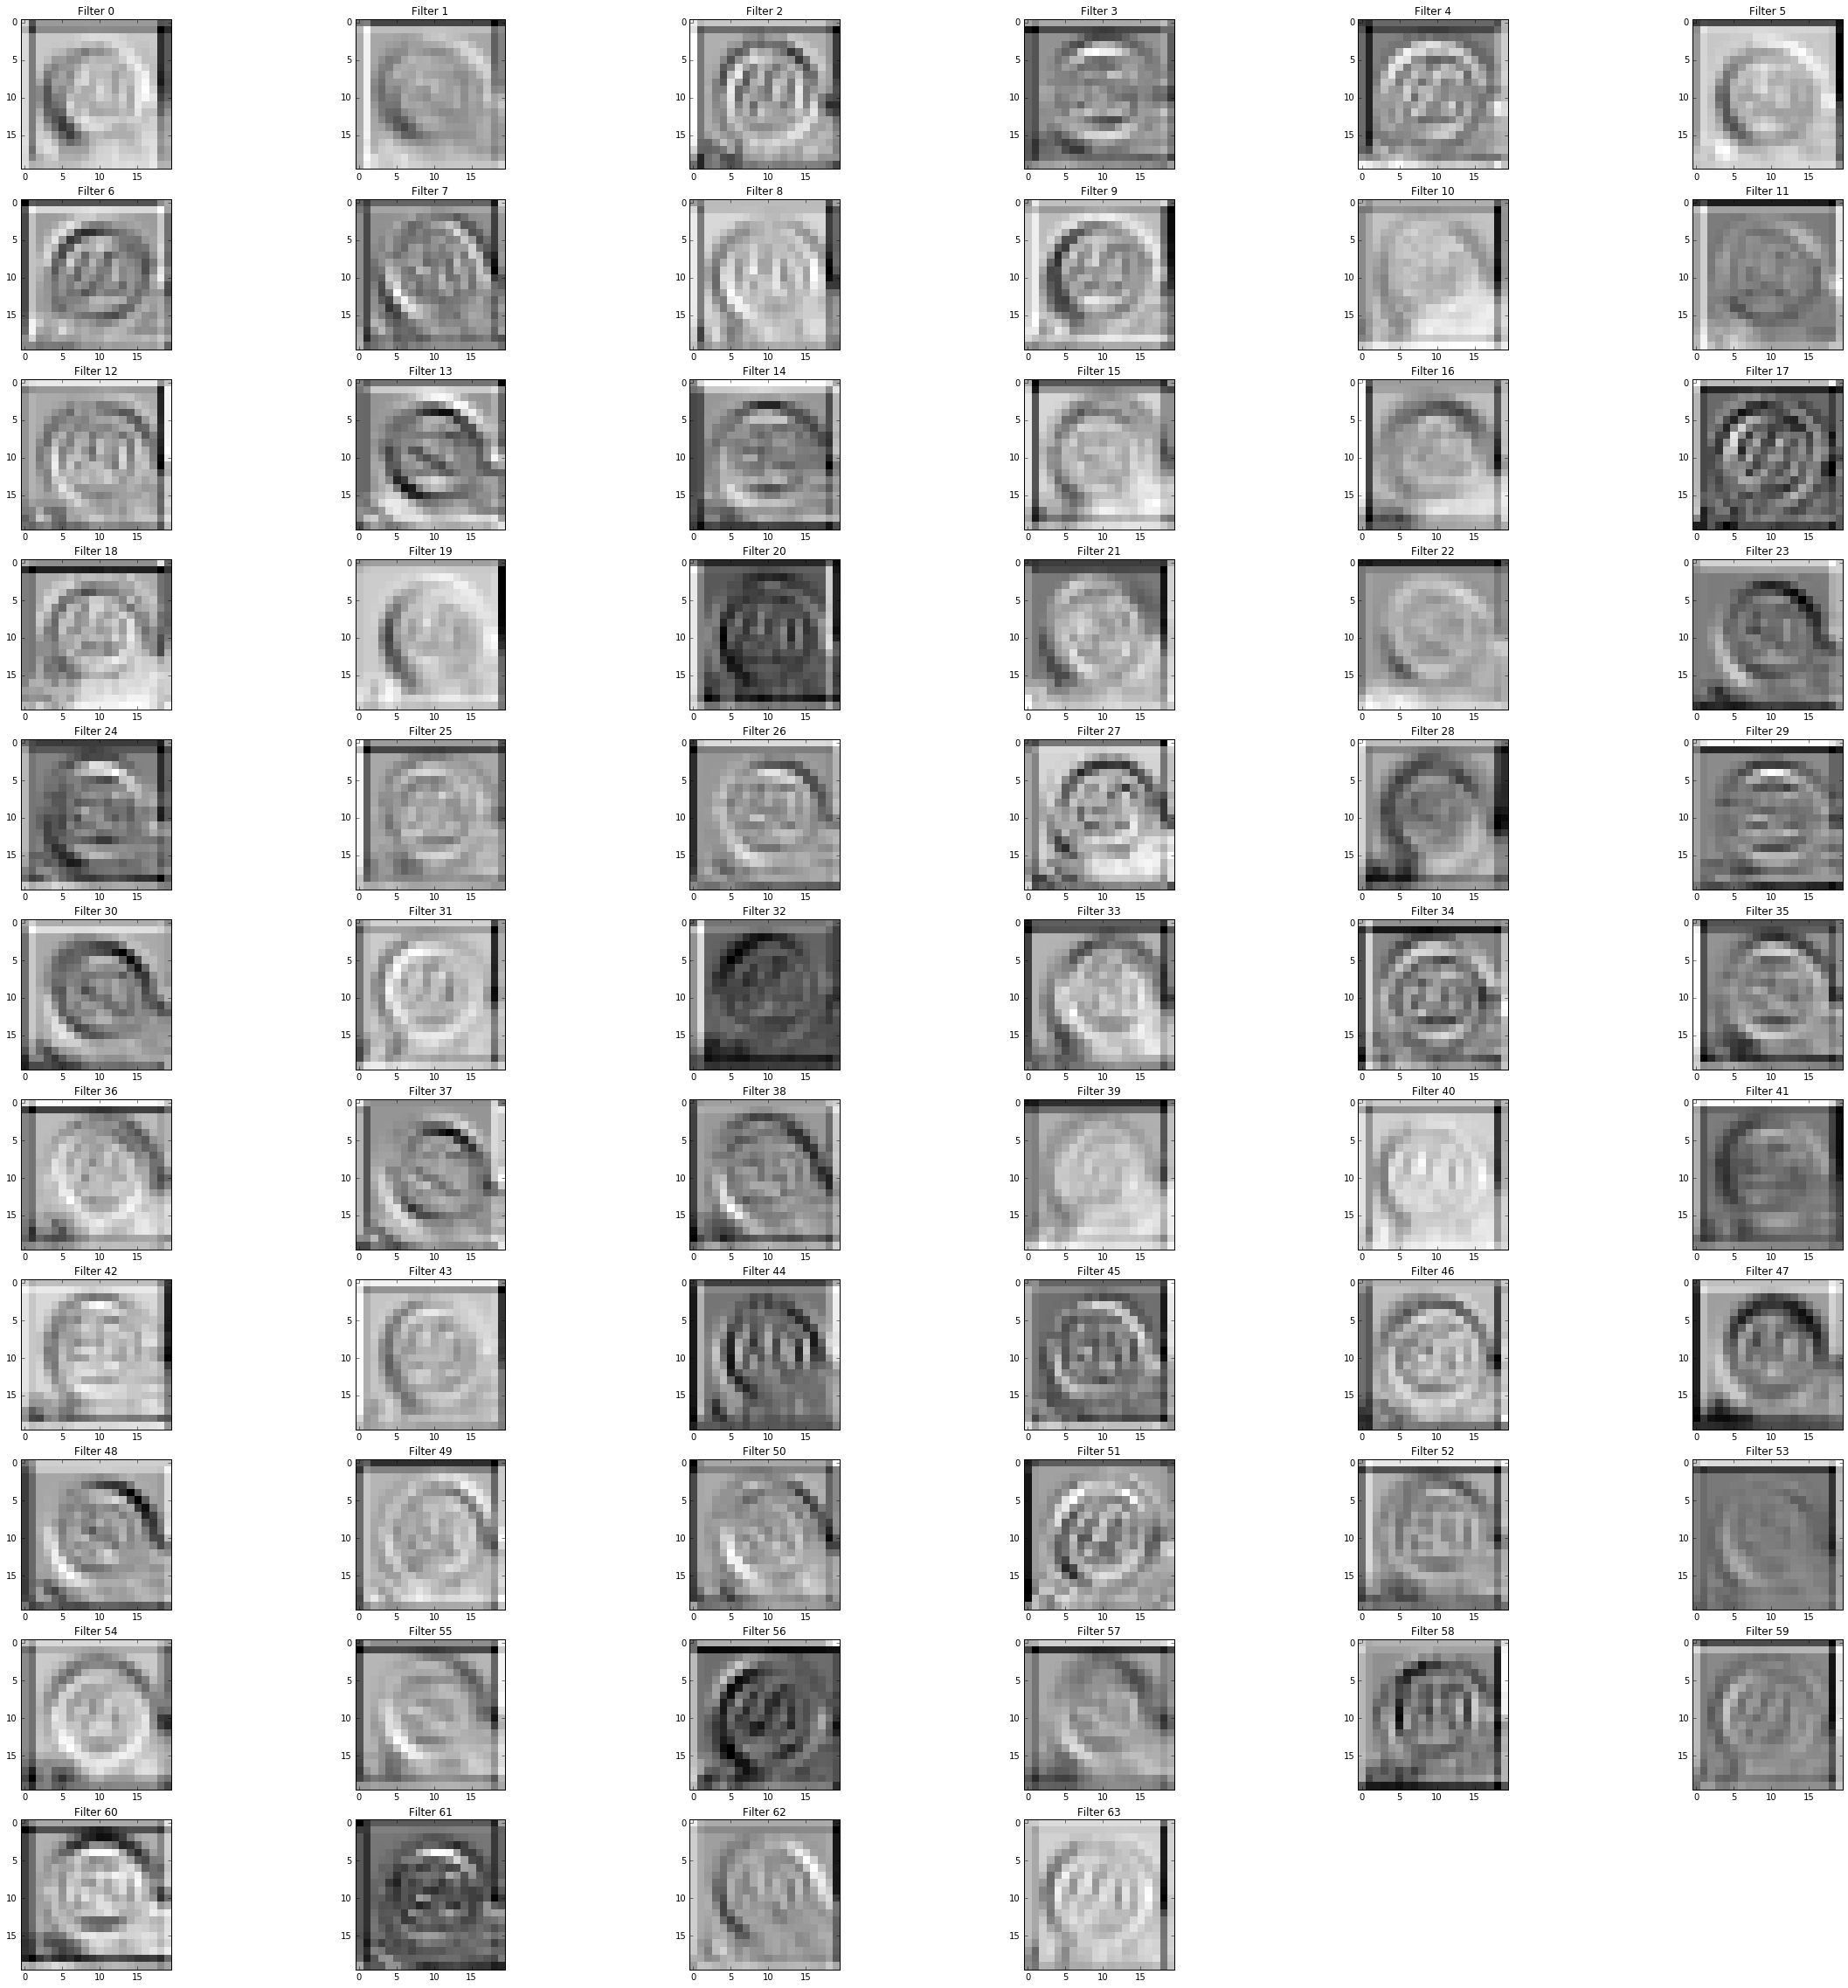

In [31]:
getActivations(conv2, test_image)

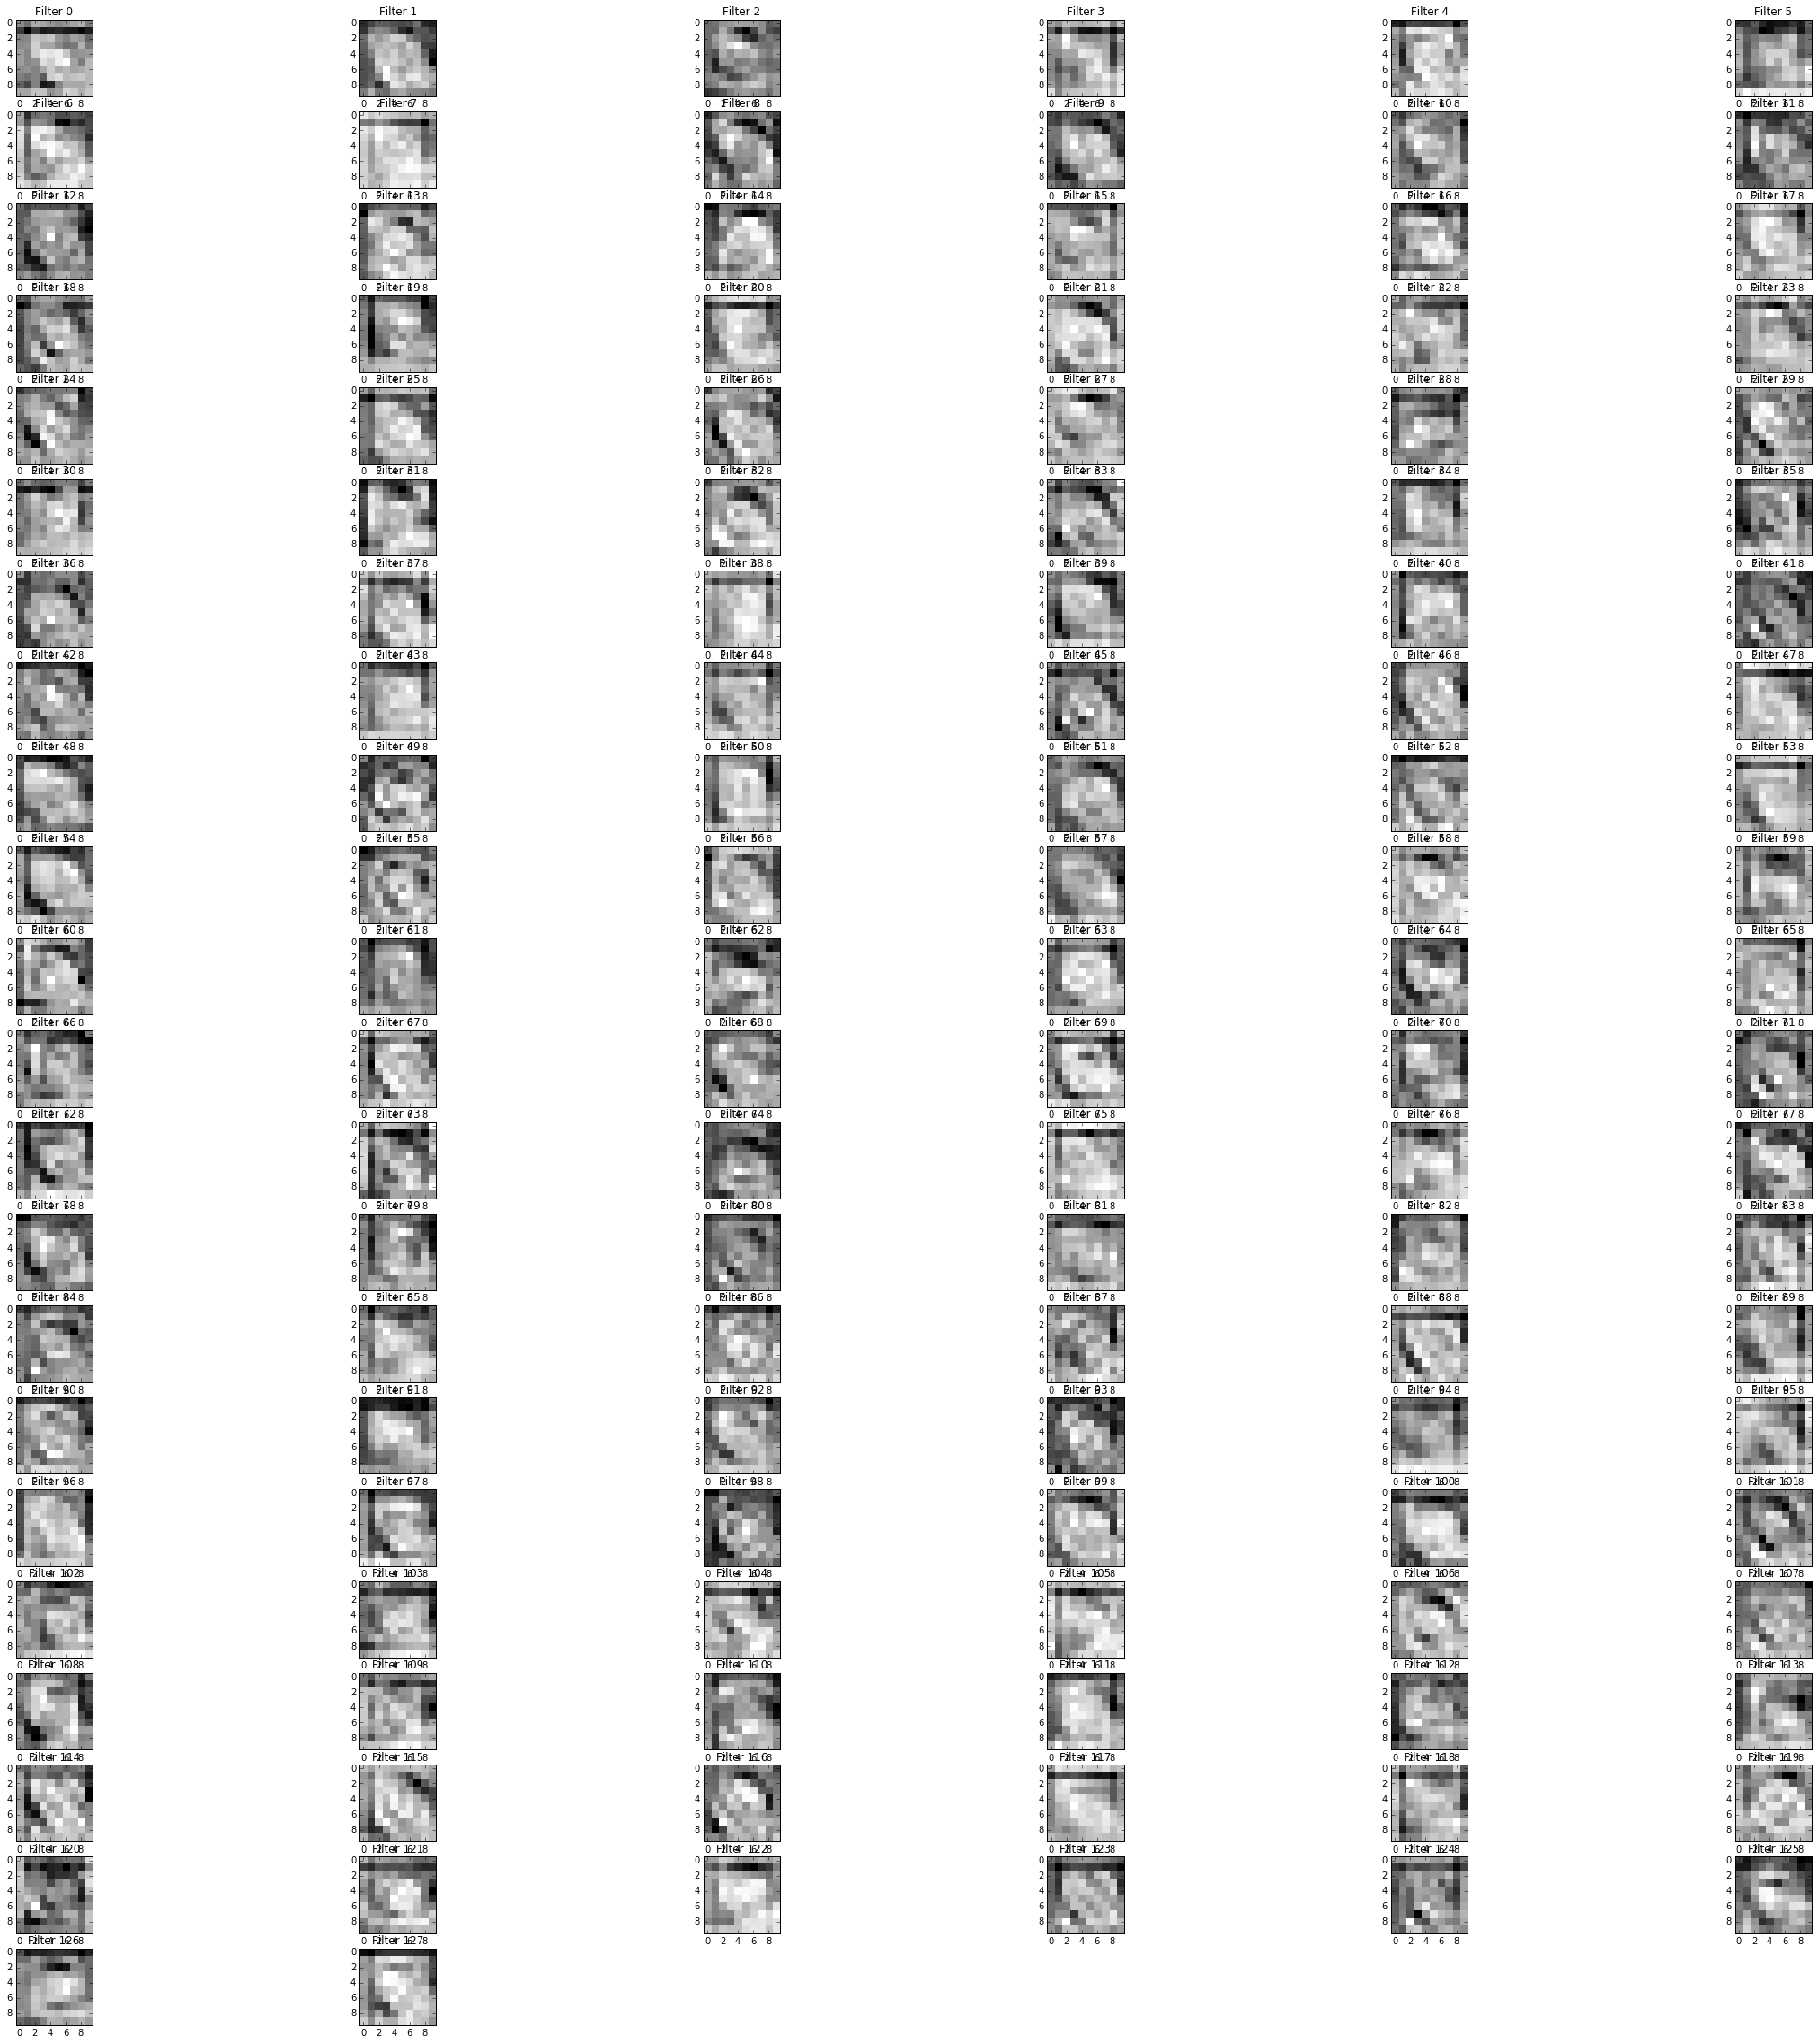

In [32]:
getActivations(conv3, test_image)